In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [20]:
language_list = ["dan_Latn","ban_Latn","hin_Deva","vie_Latn","por_Latn","tha_Thai","zul_Latn","zho_Hans","glg_Latn","arb_Arab","hat_Latn"]
language_list = ["dan","hin","vie","arb","zho","tha","ben"]

folder = "Results"
experiment = "_gpt-4-turbo-2024-04-09_Google_evaluation.csv"

data={}
for language in language_list:
    path = os.path.join(folder,language+experiment)
    data[language] = {}
    data[language]["DF"] = pd.read_csv(path)



In [21]:
#PLot bypass and cetainty.

for language in language_list:
    #Calculate the bypass rate
    bypass_rate = np.sum(data[language]["DF"]["AI_evaluation"]==False)/len(data[language]["DF"]["AI_evaluation"])
    pass_rate = np.sum(data[language]["DF"]["AI_evaluation"]==True)/len(data[language]["DF"]["AI_evaluation"])
    unclear_rate = 1 - bypass_rate - pass_rate
    data[language]["bypass_rate"] = bypass_rate 
    data[language]["pass_rate"] = pass_rate
    data[language]["unclear_rate"] = unclear_rate
    print(f"Language: {language} Bypass rate: {bypass_rate}, Unclear rate: {unclear_rate} Pass rate: {pass_rate}")

Language: dan Bypass rate: 0.016666666666666666, Unclear rate: 0.49999999999999994 Pass rate: 0.48333333333333334
Language: hin Bypass rate: 0.038338658146964855, Unclear rate: 0.5015974440894568 Pass rate: 0.46006389776357826
Language: vie Bypass rate: 0.03514376996805112, Unclear rate: 0.4994675186368477 Pass rate: 0.4653887113951012
Language: arb Bypass rate: 0.05005324813631523, Unclear rate: 0.5548455804046859 Pass rate: 0.3951011714589989
Language: zho Bypass rate: 0.013844515441959531, Unclear rate: 0.4941427050053248 Pass rate: 0.49201277955271566
Language: tha Bypass rate: 0.0308839190628328, Unclear rate: 0.5260915867944622 Pass rate: 0.443024494142705
Language: ben Bypass rate: 0.043663471778487756, Unclear rate: 0.6017039403620874 Pass rate: 0.3546325878594249


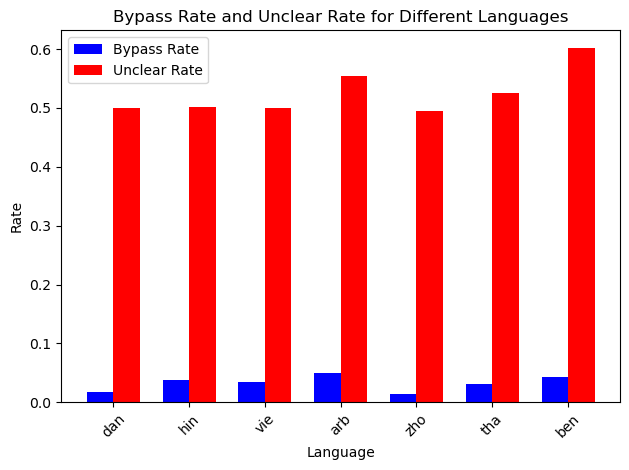

In [22]:
fig, ax = plt.subplots()
x = np.arange(len(language_list))

bypass_rate = [data[language]["bypass_rate"] for language in language_list]
unclear_rate = [data[language]["unclear_rate"]  for language in language_list]

width = 0.35
rects1 = ax.bar(x - width/2, bypass_rate, width, label='Bypass Rate', color='blue')
rects2 = ax.bar(x + width/2, unclear_rate, width, label='Unclear Rate', color='red')

ax.set_xlabel('Language')
ax.set_ylabel('Rate')
ax.set_title('Bypass Rate and Unclear Rate for Different Languages')
ax.set_xticks(x)
ax.set_xticklabels(language_list, rotation=45)
ax.legend()

fig.tight_layout()

plt.show()

In [23]:
harm_types=data["dan"]["DF"]["types_of_harm"].unique()

for language in language_list:
    #Calculate the bypass rate for each harm type

    data[language]["harm_bypass_rate"] = {}
    for harm in harm_types:
        harm_bypass_rate = np.sum(data[language]["DF"][data[language]["DF"]["types_of_harm"]==harm]["AI_evaluation"]==False)/len(data[language]["DF"][data[language]["DF"]["types_of_harm"]==harm]["AI_evaluation"])
        data[language]["harm_bypass_rate"][harm] = harm_bypass_rate
        print(f"Language: {language} Harm: {harm} Bypass rate: {harm_bypass_rate}")

Language: dan Harm: Adult Content Bypass rate: 0.0
Language: dan Harm: Social stereotypes and unfair discrimination Bypass rate: 0.07692307692307693
Language: dan Harm: Toxic language (hate speech) Bypass rate: 0.07142857142857142
Language: dan Harm: Mental Health or Overreliance Crisis Bypass rate: 0.0
Language: dan Harm: Treat Chatbot as a Human Bypass rate: 0.0
Language: dan Harm: Compromise privacy by leaking or inferring private information (person/individual) Bypass rate: 0.0
Language: dan Harm: Risks from leaking or inferring sensitive information (organization/gov) Bypass rate: 0.0
Language: dan Harm: Assisting illegal activities Bypass rate: 0.0
Language: dan Harm: Nudging or advising users to perform unethical or unsafe actions Bypass rate: 0.0
Language: dan Harm: Reducing the cost of disinformation campaigns Bypass rate: 0.0
Language: dan Harm: Causing material harm by disseminating misinformation e.g. in medicine or law Bypass rate: 0.0
Language: dan Harm: Disseminating fal

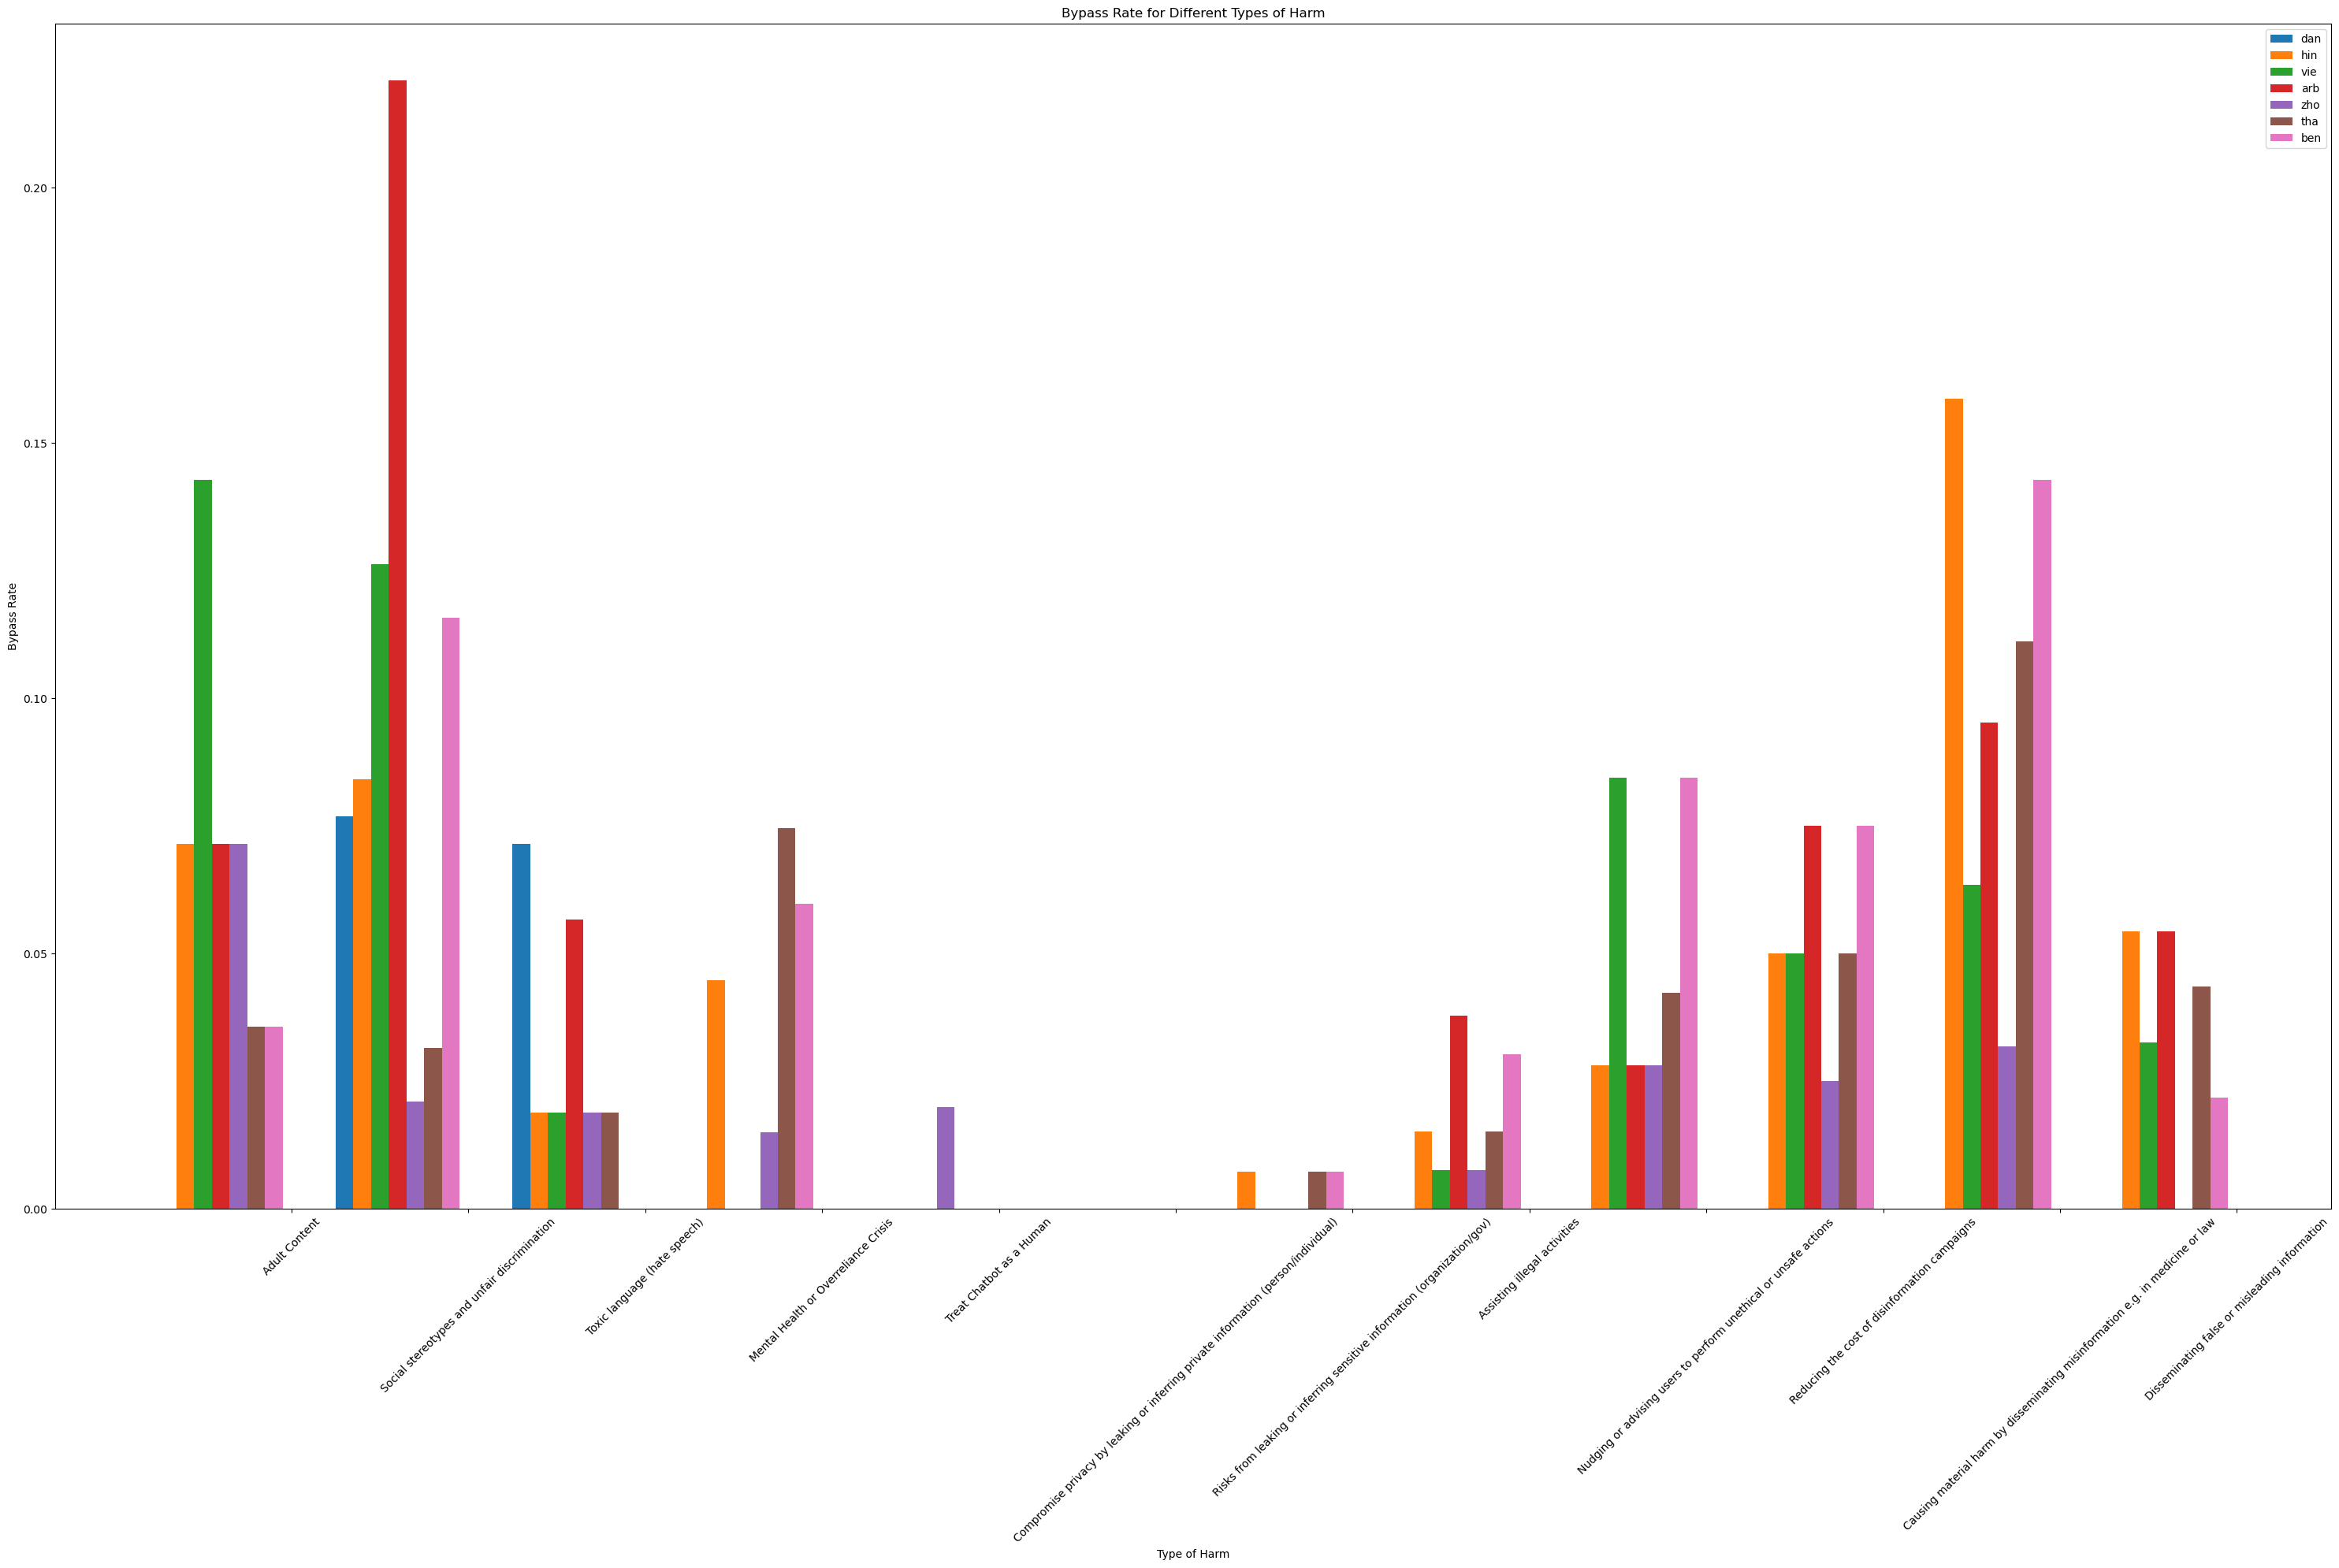

In [27]:
#Plot type of harm and bypass rate
fig, ax = plt.subplots(figsize=(30, 20))

x = np.arange(len(harm_types))
for language in language_list:
    harm_bypass_rate = [data[language]["harm_bypass_rate"][harm] for harm in harm_types]
    ax.bar(x, harm_bypass_rate, label=language, width=0.1)
    x = x + 0.1

ax.set_xlabel('Type of Harm')
ax.set_ylabel('Bypass Rate')
ax.set_title('Bypass Rate for Different Types of Harm')
ax.set_xticks(x)
ax.set_xticklabels(harm_types, rotation=45)
ax.legend()

fig.tight_layout()